Item Similarity

In [2]:
import numpy as np
import pandas as pd
import turicreate
import matplotlib.pyplot as plt

In [14]:
train = turicreate.SFrame.read_csv('train.csv')
test = turicreate.SFrame.read_csv('test.csv')
songs = turicreate.SFrame.read_csv('songs.csv')

Finished parsing file /home/ubuntu/PRML Data Contest/train.csv

Parsing completed. Parsed 100 lines in 0.126449 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/ubuntu/PRML Data Contest/train.csv

Parsing completed. Parsed 710109 lines in 0.162424 secs.

Finished parsing file /home/ubuntu/PRML Data Contest/test.csv

Parsing completed. Parsed 100 lines in 0.103198 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/ubuntu/PRML Data Contest/test.csv

Parsing completed. Parsed 670681 lines in 0.132583 secs.

Finished parsing file /home/ubuntu/PRML Data Contest/songs.csv

Parsing completed. Parsed 100 lines in 0.01221 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/ubuntu/PRML Data Contest/songs.csv

Parsing completed. Parsed 9981 lines in 0.012361 secs.

In [21]:
songs = songs.dropna()
songs

song_id,platform_id,released_year,language,number_of_comments
8328,T17332564,2013,eng,1936
8591,T773514,1925,eng,420
718,U10975,1929,eng,5485
6593,Y12839,1968,,200
743,Q28881,2002,en-US,10411
2682,W12891107,2012,en-US,1929
8137,T25828204,2015,,2691
6867,R14082,1943,eng,450
4245,U1298205,1940,,61
502,X138398,2004,en-GB,3397


In [24]:
m1 = turicreate.item_content_recommender.create(item_data = songs, item_id = 'song_id', observation_data = train, target='score', user_id = 'customer_id')

Applying transform:
Class             : AutoVectorizer

Model Fields
------------
Features          : ['platform_id', 'released_year', 'language', 'number_of_comments']
Excluded Features : ['song_id']

Column              Type  Interpretation  Transforms  Output Type
------------------  ----  --------------  ----------  -----------
platform_id         str   categorical     None        str        
released_year       int   numerical       None        int        
language            str   categorical     None        str        
number_of_comments  int   numerical       None        int        


Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 9965    | 0.0100351   | 8.208ms      |

| Done         |         | 100         | 1.73s        |

+--------------+---------+-------------+--------------+

Preparing data set.

Data has 710109 observations with 14053 users and 10000 items.

Data prepared in: 0.428235s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.034982s

In [25]:
eval = m1.evaluate(train, target = 'score')

recommendations finished on 1000/14053 queries. users per second: 46151

recommendations finished on 2000/14053 queries. users per second: 48893.8

recommendations finished on 3000/14053 queries. users per second: 49610.6

recommendations finished on 4000/14053 queries. users per second: 50013.8

recommendations finished on 5000/14053 queries. users per second: 50435.8

recommendations finished on 6000/14053 queries. users per second: 50539.9

recommendations finished on 7000/14053 queries. users per second: 50639.5

recommendations finished on 8000/14053 queries. users per second: 50852.4

recommendations finished on 9000/14053 queries. users per second: 50982.8

recommendations finished on 10000/14053 queries. users per second: 51095

recommendations finished on 11000/14053 queries. users per second: 51111

recommendations finished on 12000/14053 queries. users per second: 51016.5

recommendations finished on 13000/14053 queries. users per second: 51096.4

recommendations finished on 14000/14053 queries. users per second: 50647.2


Precision and recall summary statistics by cutoff
+--------+----------------+-------------+
| cutoff | mean_precision | mean_recall |
+--------+----------------+-------------+
|   1    |      0.0       |     0.0     |
|   2    |      0.0       |     0.0     |
|   3    |      0.0       |     0.0     |
|   4    |      0.0       |     0.0     |
|   5    |      0.0       |     0.0     |
|   6    |      0.0       |     0.0     |
|   7    |      0.0       |     0.0     |
|   8    |      0.0       |     0.0     |
|   9    |      0.0       |     0.0     |
|   10   |      0.0       |     0.0     |
+--------+----------------+-------------+
[10 rows x 3 columns]


Overall RMSE: 3.9906471301093

Per User RMSE (best)
+-------------+--------------------+-------+
| customer_id |        rmse        | count |
+-------------+--------------------+-------+
|    O49679   | 0.9819999931927939 |   18  |
+-------------+--------------------+-------+
[1 rows x 3 columns]


Per User RMSE (worst)
+-------------+

In [5]:
preds = np.array(m1.predict(test))

In [6]:
preds

array([0.04624801, 0.00476125, 0.01840003, ..., 0.0046751 , 0.00454983,
       0.        ])

In [8]:
sub=pd.DataFrame(preds, columns=['score'])

In [9]:
sub['test_row_id'] = sub.index
sub=sub.reindex(columns=['test_row_id', 'score'])



In [10]:
sub['score']

,test_row_id,score
670676,670676,0.000000
670677,670677,0.031956
670678,670678,0.004675
670679,670679,0.004550
670680,670680,0.000000


(array([5.40404e+05, 1.00977e+05, 2.29820e+04, 4.55000e+03, 1.21000e+03,
        3.19000e+02, 1.49000e+02, 5.00000e+01, 2.80000e+01, 1.20000e+01]),
 array([0.        , 0.01760493, 0.03520986, 0.05281479, 0.07041972,
        0.08802465, 0.10562958, 0.12323451, 0.14083944, 0.15844437,
        0.1760493 ]),
 <BarContainer object of 10 artists>)

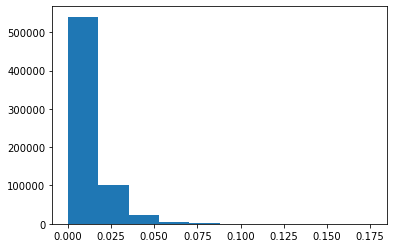

In [14]:
plt.hist(sub['score'])

In [15]:
max(sub['score'])

0.17604930292476306

In [26]:
sub.to_csv('base_v1.csv', index=False)

In [18]:
sf2 = turicreate.SFrame({'user_id': ['0', '0', '0', '1', '1', '2', '2', '2'],
                        'item_id': ['a', 'b', 'c', 'a', 'b', 'b', 'c', 'd'],
                        'rating': [1, 3, 2, 5, 4, 1, 4, 3]})
m2 = turicreate.item_similarity_recommender.create(sf2, target="rating",
                                                  similarity_type='cosine')
m2.predict(sf2)

Preparing data set.

Data has 8 observations with 3 users and 4 items.

Data prepared in: 0.003657s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 624us                          | 100        |

+--------------------------------+------------+

dtype: float
Rows: 8
[0.9430858890215555, 0.5872244636217753, 0.4677642782529195, 1.7692307233810425, 2.211538404226303, 0.7808215022087097, 1.040603518486023, 1.2579416235287983]

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 943us                               | 37.5             | 1               |

| 9.433ms                             | 100              | 4               |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.010321s